# Predicting a grade of a student

Importing all the needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


#### Reading the data
https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [2]:
data = pd.read_csv('student-mat.csv', sep = ';')

print(data.head())
data.describe()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Building our model

Selecting the attributes I think matters.

In [3]:
data = data[["studytime", "failures", "famrel", "Dalc", "absences", "G1", "G2", "G3"]]

#### Linear regression

In [4]:
x = np.array(data.drop(["G3"], 1))
y = np.array(data["G3"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

'''
# Training model multiple times for best score and saving it to a pickle
best = 0
for _ in range(10000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    clf = LinearRegression()

    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    
    if acc > best:
        best = acc
        with open("model.pickle", "wb") as f:
            pickle.dump(clf, f)
'''

# Loading our classifier from the pickle
clf_pickle = open("model.pickle", "rb")

clf = pickle.load(clf_pickle)
acc = clf.score(x_test, y_test)
print("Accuracy: " + str(acc))
print("\nCoefficient: ", clf.coef_)
print("\nIntercept: ", clf.intercept_)


pred = clf.predict(x_test)

for i in range(len(pred)):
    print(f'\nPredicted grade:    {pred[i]} \nFinal grade:        {y_test[i]} \nStudytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: {x_test[i]}')

Accuracy: 0.9205213810100569

Coefficient:  [-0.19881234 -0.26981172  0.36255025  0.02961025  0.04015226  0.1355274
  1.00123287]

Intercept:  -3.0225922114930874

Predicted grade:    5.3072342330922595 
Final grade:        0 
Studytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: [1 1 5 1 0 7 6]

Predicted grade:    8.01938196902465 
Final grade:        8 
Studytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: [2 0 4 1 0 7 9]

Predicted grade:    7.304292746472715 
Final grade:        8 
Studytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: [4 0 5 1 8 7 8]

Predicted grade:    9.010048612195126 
Final grade:        9 
Studytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: [ 1  0  3  1 22  9  9]

Predicted grade:    6.514993879846136 
Final grade:        8 
Studytime, Failures, Familyrelations, Dalc, Absences, G1, G2, G3: [2 0 5 1 0 8 7]

Predicted grade:    -1.5108412259951614 
Final grade:        0 
Studytime, Failures, Familyrelations, Da

#### Visualizing the results

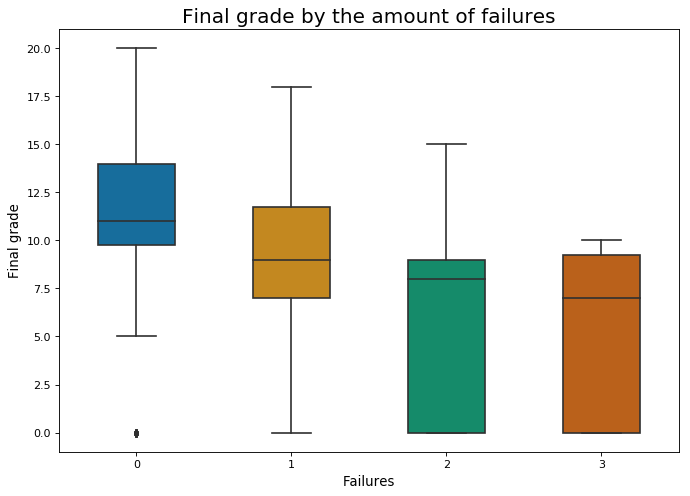

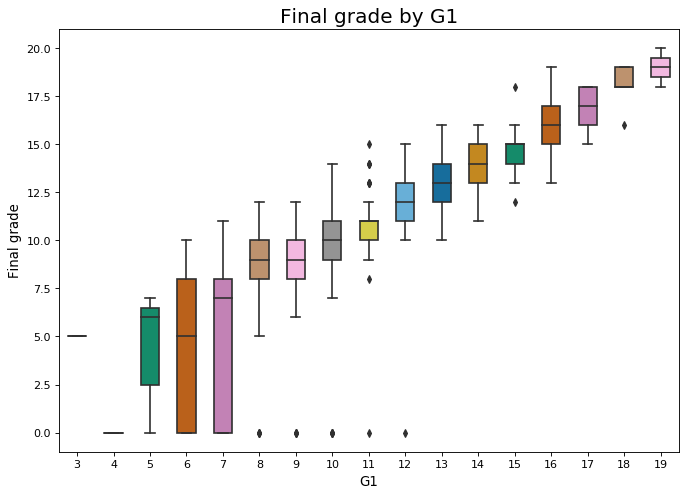

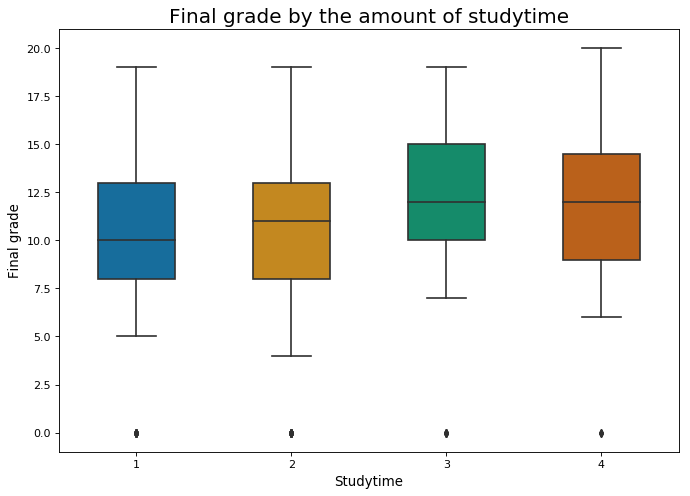

In [5]:
x_ax = 'failures'

plt.figure(figsize=(10,7), dpi= 80)
bplot = sns.boxplot(y='G3', x=x_ax, data=data, width=0.5, palette='colorblind')
plt.title('Final grade by the amount of failures', fontsize=18)
bplot.set_xlabel("Failures",fontsize=12)
bplot.set_ylabel("Final grade",fontsize=12)
plt.show()

x_ax = 'G1'

plt.figure(figsize=(10,7), dpi= 80)
bplot = sns.boxplot(y='G3', x=x_ax, data=data, width=0.5, palette='colorblind')
plt.title('Final grade by G1', fontsize=18)
bplot.set_xlabel("G1",fontsize=12)
bplot.set_ylabel("Final grade",fontsize=12)
plt.show()

x_ax = 'studytime'

plt.figure(figsize=(10,7), dpi= 80)
bplot = sns.boxplot(y='G3', x=x_ax, data=data, width=0.5, palette='colorblind')
plt.title('Final grade by the amount of studytime', fontsize=18)
bplot.set_xlabel("Studytime",fontsize=12)
bplot.set_ylabel("Final grade",fontsize=12)
plt.show()